# **CAR PRICE PREDICTION ANALYSIS**







## **Problem Statement**
The primary challenge in the car industry is accurately valuing vehicles amid fluctuating market demands, changing consumer preferences, and diverse product offerings. Car manufacturers, dealerships, and resellers need a reliable way to price vehicles competitively while accounting for features that consumers value most. Incorrect pricing, whether too high or too low, can lead to lost sales, reduced profitability, or diminished brand perception. By developing a model that predicts car prices based on key attributes, businesses can address this issue, ensuring that pricing aligns with market expectations and maximizes revenue potential.





In this project, I aim to accurately predict the **Manufacturer’s Suggested Retail Price (MSRP)** of a car based on various features such as engine specifications, fuel efficiency, vehicle size, and popularity. By building a reliable pricing model, we aim to understand how different attributes contribute to a car’s value, which can help stakeholders set fair, competitive prices and make informed purchasing or lending decisions.

### **Who Might Be Interested in This Problem and Why?**

This problem is relevant to car manufacturers, dealerships, insurance companies, financial institutions, and consumers, all of whom rely on accurate car pricing. For manufacturers and dealerships, insights into price drivers enable competitive positioning and tailored offerings. Insurance and finance companies use price predictions for risk assessment and loan structuring. Additionally, consumers benefit by making informed purchasing decisions, while market analysts gain valuable insights into trends and consumer preferences. Overall, understanding what influences car pricing supports strategic decisions across the automotive industry.


### **Dataset Description**

This data contains over 10,000 automobiles (each record represents an actual car) and their attributes. The target variable of interest is MSRP (manufacturer-suggested price).The dataset includes the following attributes:

- **Make**: Brand of the car (e.g., BMW).
- **Model**: Specific model name or number of the car (e.g., 1 Series M).
- **Year**: Manufacturing year of the car model, which may influence price due to factors like age and technology (e.g., 2011).
- **Engine Fuel Type**: Type of fuel the engine requires, such as premium unleaded, diesel, or electric, impacting performance and cost (e.g., premium unleaded).
- **Engine HP**: Engine horsepower, indicating the power output of the engine; higher horsepower generally correlates with higher prices (e.g., 335.0).
- **Engine Cylinders**: Number of cylinders in the engine, affecting performance and efficiency (e.g., 6.0).
- **Transmission Type**: Type of transmission, such as manual or automatic, influencing driving experience and appeal (e.g., MANUAL).
- **Driven Wheels**: Describes the drivetrain layout, such as front-wheel drive, rear-wheel drive, or all-wheel drive, which can impact handling and market value (e.g., rear wheel drive).
- **Number of Doors**: Number of doors on the vehicle, which may relate to the car’s category (e.g., 2.0).
- **Market Category**: Labels indicating the car's market positioning, such as luxury or performance, which can affect consumer demand (e.g., Luxury, High-Performance).
- **Vehicle Size**: Classification of the car based on size, such as compact, midsize, or large, which influences price and market segment (e.g., Compact).
- **Vehicle Style**: Body style of the car, such as sedan, SUV, or coupe, which influences consumer preference and pricing (e.g., Coupe).
- **Highway MPG**: Fuel efficiency measured in miles per gallon for highway driving, often associated with operating costs (e.g., 26).
- **City MPG**: Fuel efficiency in miles per gallon for city driving, reflecting potential cost savings in urban areas (e.g., 19).
- **Popularity**: Popularity index of the car, indicating its demand or market presence (e.g., 3916).
- **MSRP**: The target variable, representing the manufacturer-suggested retail price for the car (e.g., $46,135).

I will use this dataset to perform a regression analysis, focusing on categorizing the MSRP (price) based on the available car features. This analysis will provide insights into the key factors that influence car pricing categories in the market.

### Importing packages

In [9]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns





### Upload and Read the data from my local computer

In [10]:
from google.colab import drive
drive.mount('/content/drive')

# Import csv file from drive
path="/content/drive/MyDrive/Colab Notebooks/car_pricing.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Load the uploaded CSV file into a DataFrame
df=pd.read_csv(path)

## Data Exploration

### Descriptive Exploration
I will inspect the structure, types, and basic statistics to gain initial insights.


In [12]:
# Print out the number of observations for the origianl dataset
print("Number of Observations for full data:",df.shape[0])

Number of Observations for full data: 11914


In [13]:
# Separate numerical and categorical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical variables:", numerical_vars)
print("Categorical variables:", categorical_vars)


Numerical variables: ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
Categorical variables: ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']


In [14]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:\n", df.head())

# Display summary statistics
print("\nSummary Statistics:\n", df.describe())

# Display the DataFrame's information
print("\nDataFrame Info:\n", df.info())

# summarize the data
df.describe()

First few rows of the DataFrame:
   Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Exploratory Data Analysis (EDA)

In this EDA, I will analyze the distribution of MSRP and investigate correlations between features.

- **MSRP Distribution**: Understanding the spread of the target variable, MSRP, helps in selecting the appropriate model and transformations.
- **Correlation Matrix**: By examining correlations, I can identify features that have strong linear relationships with MSRP, which may enhance model accuracy.

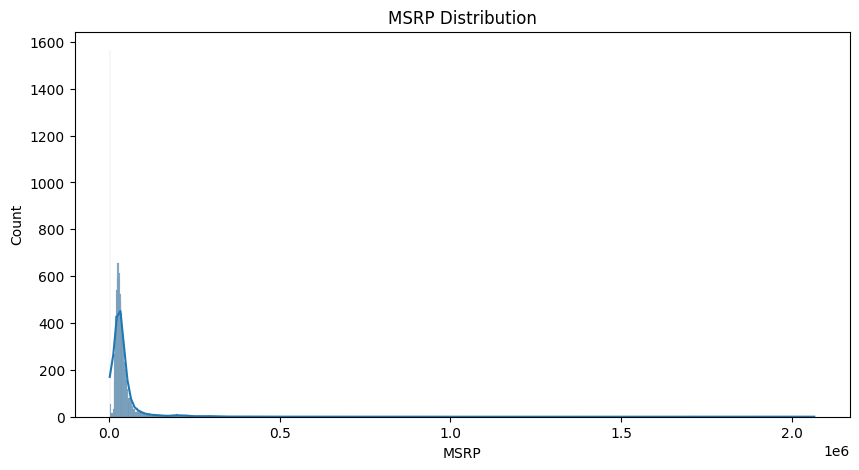

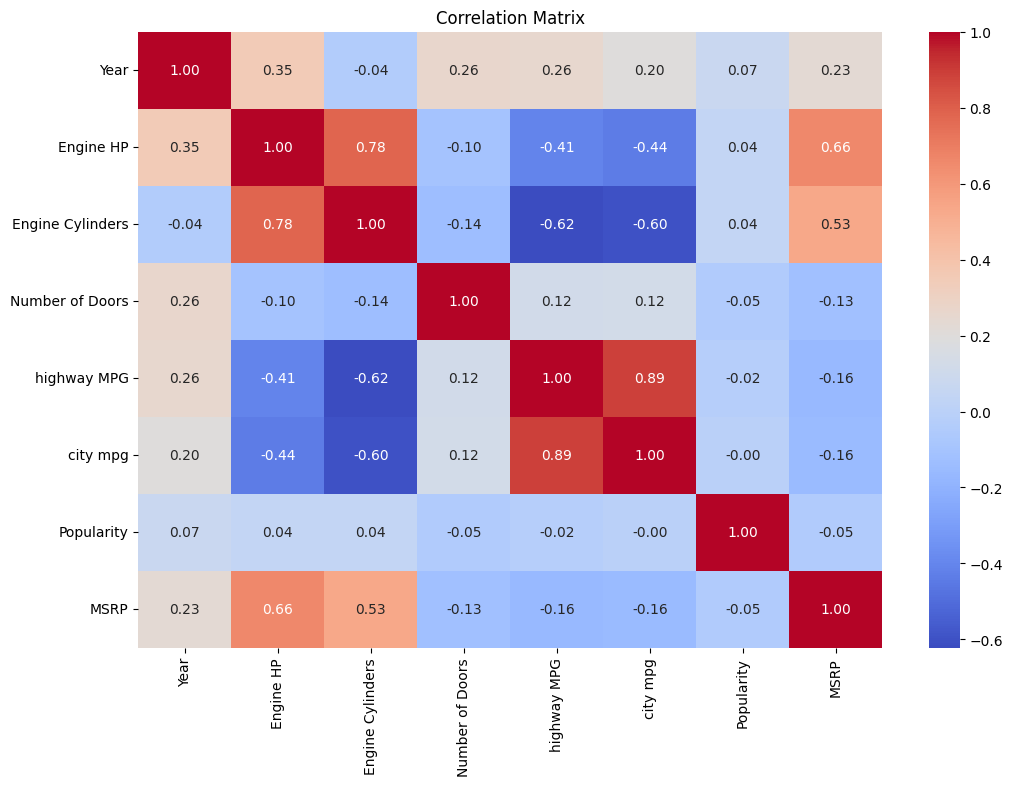

In [15]:
# Plot MSRP distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['MSRP'], kde=True)
plt.title('MSRP Distribution')
plt.xlabel('MSRP')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number) # Select only numerical columns

sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### A. Conversion

To prepare the data for regression, I will:
- Convert `Driven_Wheels` using OneHotEncoder to make it suitable for regression.
- Encode `Vehicle Size` as an ordinal variable to retain its ranking.
- Drop unused categorical columns that do not add predictive value, and handle missing values.

These steps will ensure the dataset is clean and properly formatted for training the regression model.

#### Converting Categorical Variables

In [16]:
!pip install scikit-learn
from sklearn.preprocessing import OrdinalEncoder # Import OrdinalEncoder


car_data = df.copy()  # Create a copy of the original DataFrame

# Data transformations
car_data = pd.get_dummies(car_data, columns=['Driven_Wheels'], drop_first=True)

# Ordinal encode Vehicle Size
ord_enc = OrdinalEncoder(categories=[['Compact', 'Midsize', 'Large']])
car_data['Vehicle_Size_Encoded'] = ord_enc.fit_transform(car_data[['Vehicle Size']])
car_data.drop(columns=['Vehicle Size'], inplace=True)

#### Drop Unused Data

In [17]:
# Drop other unused categorical columns, ensuring column names match the DataFrame
car_data.drop(columns=[col for col in ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Market Category', 'Vehicle Style'] if col in car_data.columns], inplace=True)

### B. Data Cleaning

#### Handling Missing Data

In [18]:
# Check for missing values
car_data.isnull().sum()

,0
Year,0
Engine HP,69
Engine Cylinders,30
Number of Doors,6
highway MPG,0
city mpg,0
Popularity,0
MSRP,0
Driven_Wheels_four wheel drive,0
Driven_Wheels_front wheel drive,0


In [19]:
car_data.dropna(inplace=True) # Drop missing values for simplicity
car_data.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Driven_Wheels_four wheel drive,Driven_Wheels_front wheel drive,Driven_Wheels_rear wheel drive,Vehicle_Size_Encoded
0,2011,335.0,6.0,2.0,26,19,3916,46135,False,False,True,0.0
1,2011,300.0,6.0,2.0,28,19,3916,40650,False,False,True,0.0
2,2011,300.0,6.0,2.0,28,20,3916,36350,False,False,True,0.0
3,2011,230.0,6.0,2.0,28,18,3916,29450,False,False,True,0.0
4,2011,230.0,6.0,2.0,28,18,3916,34500,False,False,True,0.0


In [20]:
# Check for missing values after dropping
car_data.isnull().sum()

,0
Year,0
Engine HP,0
Engine Cylinders,0
Number of Doors,0
highway MPG,0
city mpg,0
Popularity,0
MSRP,0
Driven_Wheels_four wheel drive,0
Driven_Wheels_front wheel drive,0


#### Handling Duplicate Issues

Before moving forward, I will check for and handle any duplicate records in the dataset. Duplicates can lead to biased model results by over-representing certain cars. Removing duplicates ensures that the model is trained on unique records only.

In [21]:
# Check for duplicates
duplicates_count = car_data.duplicated().sum()
print(f'Number of duplicates: {duplicates_count}')

Number of duplicates: 893


In [22]:
# Drop duplicates if any
car_data.drop_duplicates(inplace=True)

In [23]:
# Verify removal of duplicates
duplicates_count_after = car_data.duplicated().sum()
print(f'Duplicates after removal: {duplicates_count_after}')

Duplicates after removal: 0


### C. Data Visualization

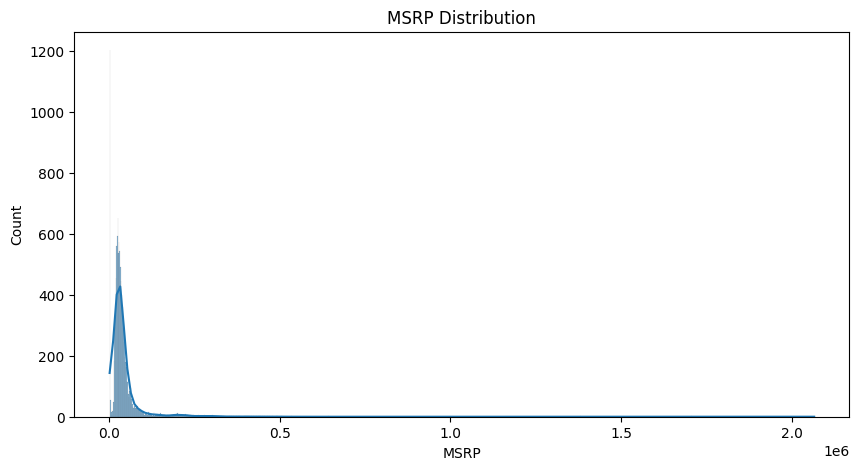

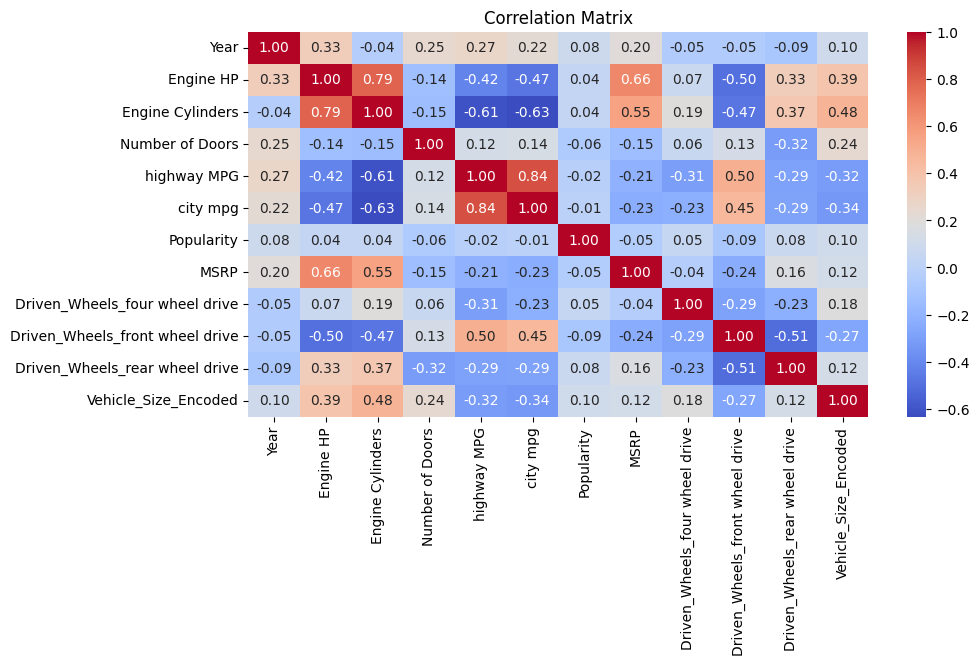

In [24]:
plt.figure(figsize=(10, 5))
sns.histplot(car_data['MSRP'], kde=True)
plt.title('MSRP Distribution')
plt.xlabel('MSRP')
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(car_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Histogram of Engine HP - MSRP Distribution:
This histogram with a kernel density estimate (KDE) helps us understand the spread and skewness of MSRP values. Knowing the distribution informs us about the data’s range and potential need for transformations, such as log-scaling, if the distribution is highly skewed.

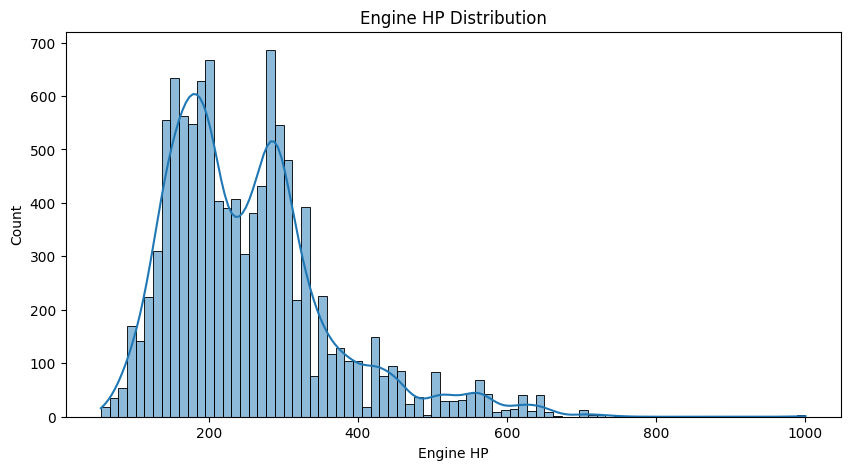

In [25]:
# Histogram of Engine HP
plt.figure(figsize=(10, 5))
sns.histplot(car_data['Engine HP'], kde=True)
plt.title('Engine HP Distribution')
plt.xlabel('Engine HP')
plt.show()

#### Scatter Plot of Engine HP vs MSRP:

This scatter plot shows the relationship between horsepower and MSRP. If a positive relationship exists, we may find that cars with higher horsepower tend to be more expensive, making horsepower a potentially strong predictor for MSRP.

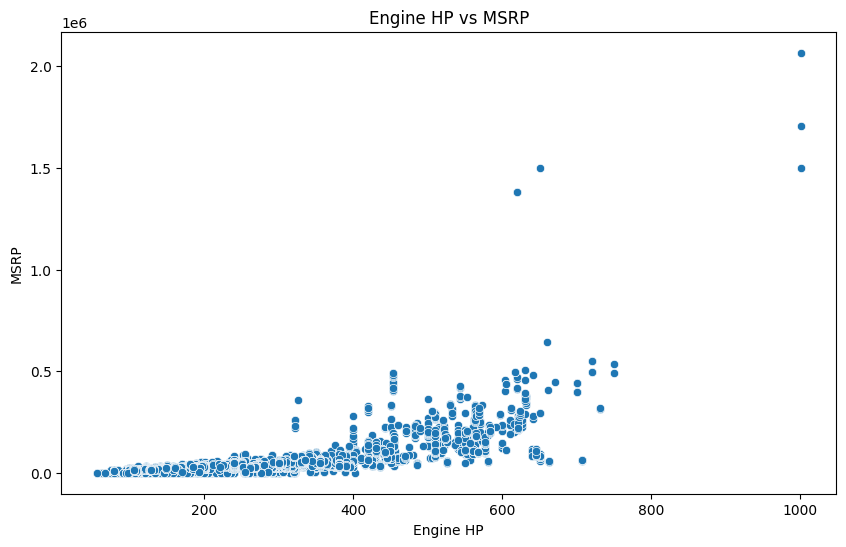

In [26]:
# Scatter Plot of Engine HP vs MSRP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine HP', y='MSRP', data=car_data)
plt.title('Engine HP vs MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

### D. Train/Test Split

I will split the dataset into training and testing sets. The training set will be used to fit the model, while the testing set will allow me to evaluate the model's performance on unseen data.

This step is essential to assess how well the model generalizes to new data.

The Train/Test Split technique involves dividing the dataset into two distinct subsets: one for training and one for testing. The model is trained using the training set and evaluated using the testing set.

By splitting the data into training and testing sets, the model can be trained on one portion of the data and evaluated on another, helping to ensure that the model generalizes well to new data rather than just memorizing the training data. The use of random_state adds an element of consistency to the process, so that the same split is generated each time, which is particularly helpful in research or when sharing code. This approach is standard practice in machine learning workflows to prevent overfitting and provide a reliable estimate of model performance.

The code snippet uses the train_test_split function from the sklearn.model_selection module to divide a dataset into two subsets: one for training and one for testing a machine learning model.

The dataset, car_data, is split with 70% of the data assigned to the training set (train) and 30% assigned to the testing set (test). The test_size=0.3 parameter controls this division by specifying that 30% of the data should be reserved for testing.

The random_state=42 ensures that the split is consistent each time the code is run, which is useful for reproducibility. The training set is used to train the model, while the test set is used to evaluate how well the model performs on unseen data.

In [27]:
from sklearn.model_selection import train_test_split

# Define target and features
X = car_data.drop(columns=['MSRP'])
y = car_data['MSRP']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training and testing data split completed.')

Training and testing data split completed.


# **Part 2:**

## 1.Regression Models

I will train three different regression models to explore how well various features predict MSRP.


### A. Training Models

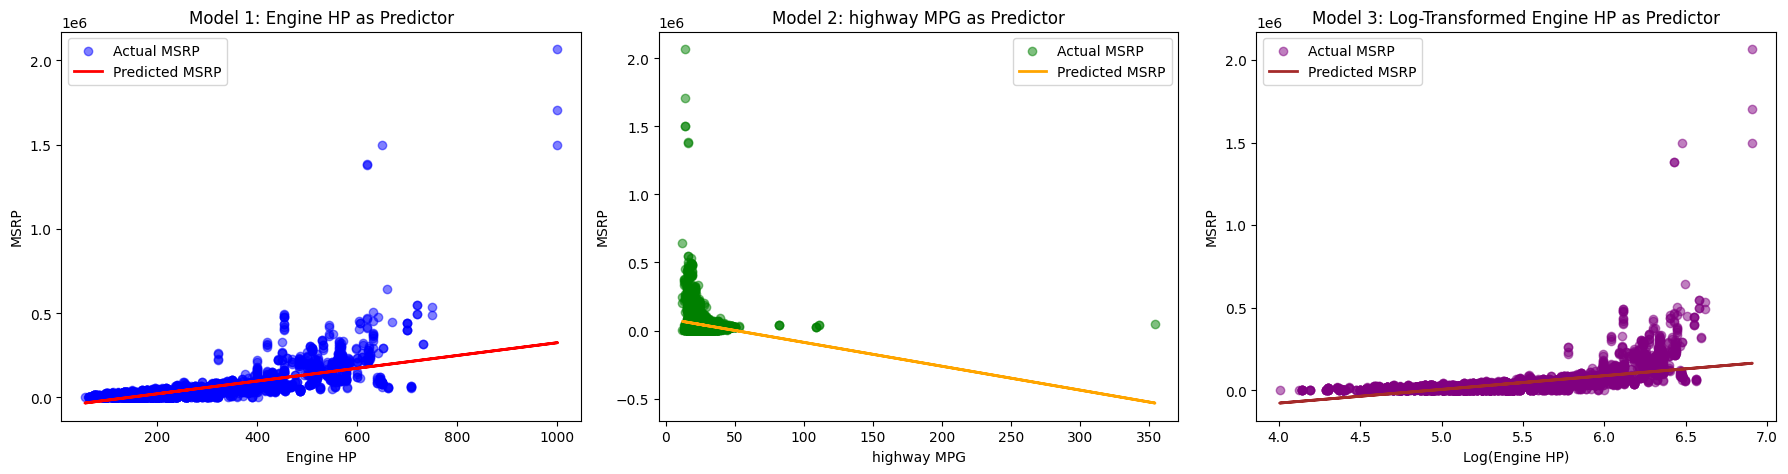

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data
# Split data into train/test for simplicity in demonstration
X_train, X_test, y_train, y_test = train_test_split(car_data[['Engine HP', 'highway MPG']], car_data['MSRP'], test_size=0.2, random_state=42)

# Model 1: Engine HP as predictor
X1 = X_train[['Engine HP']]
model1 = LinearRegression().fit(X1, y_train)
y_pred1 = model1.predict(X1)

# Model 2: highway MPG as predictor
X2 = X_train[['highway MPG']]
model2 = LinearRegression().fit(X2, y_train)
y_pred2 = model2.predict(X2)

# Model 3: Log-transformed Engine HP as predictor
X3 = np.log(X1)
model3 = LinearRegression().fit(X3, y_train)
y_pred3 = model3.predict(X3)

# Plotting the results for each model
plt.figure(figsize=(18, 5))

# Model 1 Plot
plt.subplot(1, 3, 1)
plt.scatter(X1, y_train, color="blue", alpha=0.5, label="Actual MSRP")
plt.plot(X1, y_pred1, color="red", linewidth=2, label="Predicted MSRP")
plt.title("Model 1: Engine HP as Predictor")
plt.xlabel("Engine HP")
plt.ylabel("MSRP")
plt.legend()

# Model 2 Plot
plt.subplot(1, 3, 2)
plt.scatter(X2, y_train, color="green", alpha=0.5, label="Actual MSRP")
plt.plot(X2, y_pred2, color="orange", linewidth=2, label="Predicted MSRP")
plt.title("Model 2: highway MPG as Predictor")
plt.xlabel("highway MPG")
plt.ylabel("MSRP")
plt.legend()

# Model 3 Plot
plt.subplot(1, 3, 3)
plt.scatter(X3, y_train, color="purple", alpha=0.5, label="Actual MSRP")
plt.plot(X3, y_pred3, color="brown", linewidth=2, label="Predicted MSRP")
plt.title("Model 3: Log-Transformed Engine HP as Predictor")
plt.xlabel("Log(Engine HP)")
plt.ylabel("MSRP")
plt.legend()

plt.tight_layout()
plt.show()


### **B. Calculating the MAE, MSE, and R²**

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics for Model 1: Engine HP as predictor
mae1 = mean_absolute_error(y_train, y_pred1)
mse1 = mean_squared_error(y_train, y_pred1)
r2_1 = r2_score(y_train, y_pred1)
print("Model 1 - Engine HP as Predictor")
print("MAE:", mae1)
print("MSE:", mse1)
print("R^2:", r2_1)

# Calculate metrics for Model 2: highway MPG as predictor
mae2 = mean_absolute_error(y_train, y_pred2)
mse2 = mean_squared_error(y_train, y_pred2)
r2_2 = r2_score(y_train, y_pred2)
print("\nModel 2 - highway MPG as Predictor")
print("MAE:", mae2)
print("MSE:", mse2)
print("R^2:", r2_2)

# Calculate metrics for Model 3: Log-transformed Engine HP as predictor
mae3 = mean_absolute_error(y_train, y_pred3)
mse3 = mean_squared_error(y_train, y_pred3)
r2_3 = r2_score(y_train, y_pred3)
print("\nModel 3 - Log-Transformed Engine HP as Predictor")
print("MAE:", mae3)
print("MSE:", mse3)
print("R^2:", r2_3)


Model 1 - Engine HP as Predictor
MAE: 22268.38259879081
MSE: 2429063354.2144117
R^2: 0.4203789786822495

Model 2 - highway MPG as Predictor
MAE: 26596.826122509276
MSE: 4016290899.8961277
R^2: 0.04163609842944571

Model 3 - Log-Transformed Engine HP as Predictor
MAE: 23891.03226503913
MSE: 2988403612.2802043
R^2: 0.2869096844039697


### **C.Parameter estimate of the single features**

### Model 1: `Engine HP` as Predictor
- Positive slope implies that higher horsepower leads to a higher `MSRP`, as cars with more power typically have higher prices due to performance features.

### Model 2: `Highway MPG` as Predictor
- A negative slope suggests that cars with better fuel efficiency (`MPG`) generally have a lower `MSRP`, possibly reflecting that more economical cars are priced lower than high-performance models.

### Model 3: Log-Transformed `Engine HP` as Predictor
- Positive slope with a diminishing effect means that as horsepower increases, `MSRP` also rises, but at a slower rate. This non-linear relationship reflects that very high horsepower has a smaller incremental impact on price, typical in luxury pricing structures.

## 2.Feature Selection using Forward/Backward Selection

To improve the model, I will use forward and backward selection to identify the most relevant features. This method will ensure the final model is simpler and potentially more accurate by removing redundant or irrelevant predictors.

After selecting features, I will evaluate the resulting model's MAE, MSE, and R².

### Foward Selection

In [30]:
# Function to evaluate model
def evaluate_model(X_train, y_train, X_test, y_test, selected_features):
    model = LinearRegression().fit(X_train[selected_features], y_train)
    y_pred = model.predict(X_test[selected_features])
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# Forward Selection
def forward_selection(X_train, y_train, X_test, y_test, predictors):
    selected_features = []

    print("Forward Selection Process:")
    while len(selected_features) < len(predictors):
        remaining_features = [f for f in predictors if f not in selected_features]
        scores = {}

        for feature in remaining_features:
            trial_features = selected_features + [feature]
            mae, mse, r2 = evaluate_model(X_train, y_train, X_test, y_test, trial_features)
            scores[feature] = (mae, mse, r2)

        best_feature = min(scores, key=lambda k: scores[k][1])  # Choosing based on MSE
        selected_features.append(best_feature)
        best_score = scores[best_feature]

        print(f"Added {best_feature} - MAE: {best_score[0]}, MSE: {best_score[1]}, R^2: {best_score[2]}")

    return selected_features, best_score

# Run Forward Selection
print(car_data.columns)
# Based on the output adjust the following line

predictors = car_data.columns.drop(['MSRP', 'Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'], errors='ignore')

print(car_data.columns)

X = car_data[predictors]
y = car_data['MSRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
forward_selected_features, forward_best_score = forward_selection(X_train, y_train, X_test, y_test, predictors)

print("\nSelected Features by Forward Selection:", forward_selected_features)
print("Final Forward Selection Scores - MAE:", forward_best_score[0], "MSE:", forward_best_score[1], "R^2:", forward_best_score[2])


Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Vehicle_Size_Encoded'],
      dtype='object')
Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP',
       'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive',
       'Driven_Wheels_rear wheel drive', 'Vehicle_Size_Encoded'],
      dtype='object')
Forward Selection Process:
Added Engine HP - MAE: 20819.473498133168, MSE: 1141173460.5791998, R^2: 0.536765043699499
Added Vehicle_Size_Encoded - MAE: 19036.824663846717, MSE: 1074117223.3105326, R^2: 0.5639850888669193
Added Engine Cylinders - MAE: 19951.117890230213, MSE: 1050486775.6062084, R^2: 0.5735773636505599
Added highway MPG - MAE: 19209.495565536206, MSE: 1010215603.4610295, R^2: 0.5899245845711846
Added Popula

### Backward Elimination

In [31]:
# Backward Elimination
def backward_elimination(X_train, y_train, X_test, y_test, predictors):
    selected_features = list(predictors)

    print("Backward Elimination Process:")
    while len(selected_features) > 0:
        scores = {}

        for feature in selected_features:
            trial_features = [f for f in selected_features if f != feature]
            # Check if trial_features is empty before evaluating the model
            if trial_features:  # Proceed only if there are features to evaluate
                mae, mse, r2 = evaluate_model(X_train, y_train, X_test, y_test, trial_features)
                scores[feature] = (mae, mse, r2)
            else:
                # If trial_features is empty, break the loop (no more features to remove)
                break

        # Check if scores is empty before finding the worst feature
        if scores:  # Proceed only if scores were calculated
            worst_feature = min(scores, key=lambda k: scores[k][1])  # Choosing based on MSE
            best_score = scores[worst_feature]
            selected_features.remove(worst_feature)

            print(f"Removed {worst_feature} - MAE: {best_score[0]}, MSE: {best_score[1]}, R^2: {best_score[2]}")
        else:
            # If scores is empty, break the loop (no more features to remove)
            break

    return selected_features, best_score

# Run Backward Elimination
backward_selected_features, backward_best_score = backward_elimination(X_train, y_train, X_test, y_test, predictors)

print("\nSelected Features by Backward Elimination:", backward_selected_features)
print("Final Backward Elimination Scores - MAE:", backward_best_score[0], "MSE:", backward_best_score[1], "R^2:", backward_best_score[2])

Backward Elimination Process:
Removed city mpg - MAE: 19302.941402666296, MSE: 990708002.6438986, R^2: 0.5978432778498249
Removed Driven_Wheels_front wheel drive - MAE: 19276.033472878997, MSE: 990443512.6151173, R^2: 0.5979506419194925
Removed Driven_Wheels_rear wheel drive - MAE: 19163.10426826871, MSE: 990773689.3225764, R^2: 0.5978166137476723
Removed Number of Doors - MAE: 19132.035968826112, MSE: 986581917.5427574, R^2: 0.5995181738385111
Removed Year - MAE: 19163.518331636777, MSE: 987328191.9217414, R^2: 0.5992152397173818
Removed Driven_Wheels_four wheel drive - MAE: 19185.783185015767, MSE: 996241429.086489, R^2: 0.595597101747005
Removed Popularity - MAE: 19209.495565536206, MSE: 1010215603.4610295, R^2: 0.5899245845711846
Removed highway MPG - MAE: 19951.11789023021, MSE: 1050486775.6062084, R^2: 0.5735773636505599
Removed Engine Cylinders - MAE: 19036.824663846717, MSE: 1074117223.3105326, R^2: 0.5639850888669193
Removed Vehicle_Size_Encoded - MAE: 20819.473498133168, MSE:

# **Part 3**

### 1.Final Model Decision
In this section, I will report the final regression model based on the selected features that best predict MSRP. I will evaluate the model using MAE, MSE, and R² metrics, and discuss my satisfaction with the model's performance, along with suggestions for improvement.

The Forward Selection process suggests a larger set of predictors, including features such as:
- Engine HP
- Vehicle_Size_Encoded
- Engine Cylinders
- highway MPG
- Popularity
- Driven_Wheels_four wheel drive
- Year
- Driven_Wheels_front wheel drive
- Number of Doors
- Driven_Wheels_rear wheel drive
- city mpg

While the **Backward Elimination** process simplifies the model significantly, ultimately suggesting **Engine HP** alone as the most impactful predictor, which yielded slightly lower predictive performance than the Forward Selection set.

### Chosen Set of Predictors for Final Model

For a balanced approach between complexity and performance, the **final model** will use the predictors selected by **Forward Selection**. This set provides a comprehensive view of features affecting `MSRP`, with a stronger overall performance based on MAE, MSE, and R² values.



#### A. Final Model Code

In [32]:
# Defining the final set of predictors based on Forward Selection
final_features = ['Engine HP', 'Vehicle_Size_Encoded', 'Engine Cylinders', 'highway MPG',
                  'Popularity', 'Driven_Wheels_four wheel drive', 'Year',
                  'Driven_Wheels_front wheel drive', 'Number of Doors',
                  'Driven_Wheels_rear wheel drive', 'city mpg']

# Training the final model
final_model = LinearRegression().fit(X_train[final_features], y_train)
y_pred_final = final_model.predict(X_test[final_features])

# Calculate MAE, MSE, and R2 for the final model
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

# Displaying the final model metrics
print("Final Model with Forward Selection Predictors:")
print("MAE:", mae_final)
print("MSE:", mse_final)
print("R^2:", r2_final)





Final Model with Forward Selection Predictors:
MAE: 19351.162989399785
MSE: 991759510.9564017
R^2: 0.5974164405424232


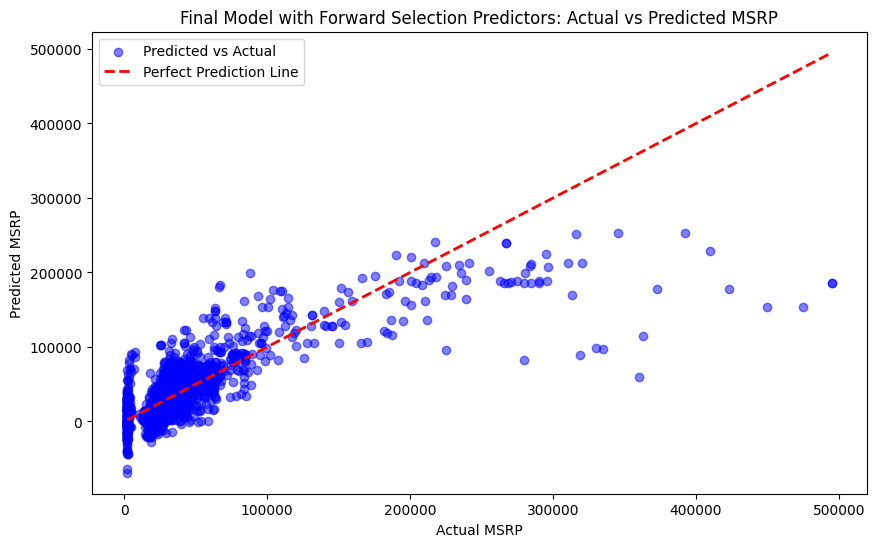

In [33]:
# Ploting Actual vs Predicted values for MSRP
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_final, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Perfect Prediction Line")
plt.xlabel("Actual MSRP")
plt.ylabel("Predicted MSRP")
plt.title("Final Model with Forward Selection Predictors: Actual vs Predicted MSRP")
plt.legend()
plt.show()

#### B. Final Model MAE, MSE, R² Results

Based on the computed values for the Forward Selection final model:
- **MAE**: 19,351.16
- **MSE**: 991,759,510.96
- **R²**: 0.5974



## 2.Conclusion



### **Satisfaction with Model Performance**
I am moderately satisfied with the final model’s performance, as it achieves an R² of 0.597, meaning it explains approximately 59.7% of the variance in car prices (MSRP). The model incorporates a well-rounded set of predictors that influence pricing, capturing a meaningful level of accuracy while balancing complexity and interpretability. However, there is still room for improvement in both predictive accuracy and feature relevance, especially as some variance remains unexplained.

### **Proposed Next Steps:**
- Introduce additional features or transformations (e.g., interaction terms, polynomial features for non-linear relationships) to capture more complex relationships in car pricing.
- Collect or integrate additional data sources, such as car brand reputation, market trends, or regional economic indicators, to improve model context and accuracy.
- Experiment with advanced models (e.g., Ridge, Lasso, or Random Forest regression) to assess if they can improve predictive accuracy and reduce error rates.

### **Potential Improvements**
- Address Non-linear Relationships More Thoroughly: Certain features, like Engine HP, may have diminishing effects on price. Incorporating non-linear regression techniques could better reflect real-world pricing dynamics.

### **Recommendations to Business Leadership**
Engine performance (HP and cylinders), fuel efficiency (MPG), and popularity are strong indicators of car price. Investments in enhancing these attributes or positioning high-performance models could align well with pricing strategies.